In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.preprocessing import StandardScaler

In [322]:
df = pd.read_csv('filtered_data.csv')
df_binary = df[['STA-8', 'POP-1']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Horizontal', 'Vertical']
#df_binary= df_binary[df_binary['Age'] < 20000]
#display the first 5 rows
#df_binary.head()


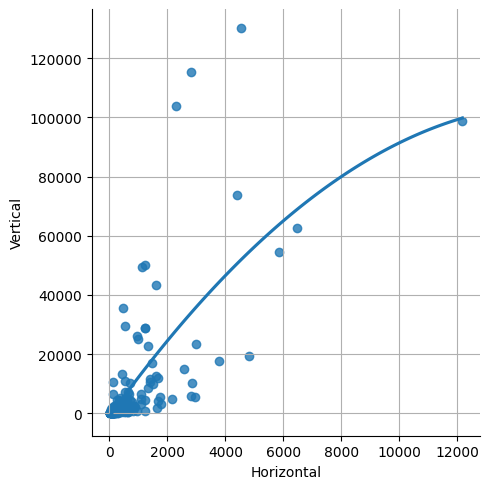

In [323]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="Horizontal", y ="Vertical", data = df_binary, order = 2, ci = None)
plt.grid()
plt.show()


In [324]:
X = np.array(df_binary['Horizontal']).reshape(-1, 1)
y = np.array(df_binary['Vertical']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
#df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, train_size=0.8, random_state=42)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.6035860197331497


In [325]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model with increased max_iter
regr = LogisticRegression(max_iter=1000)
regr.fit(X_train_scaled, y_train.ravel())

# Make predictions on the scaled test set
y_pred = regr.predict(X_test_scaled)

# Evaluate the model
accuracy = regr.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


In [326]:
from sklearn.neural_network import MLPClassifier

# Create and fit the neural network model
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)

# Evaluate the model
print(mlp_classifier.score(X_test, y_test))


c:\Users\klock\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0


c:\Users\klock\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


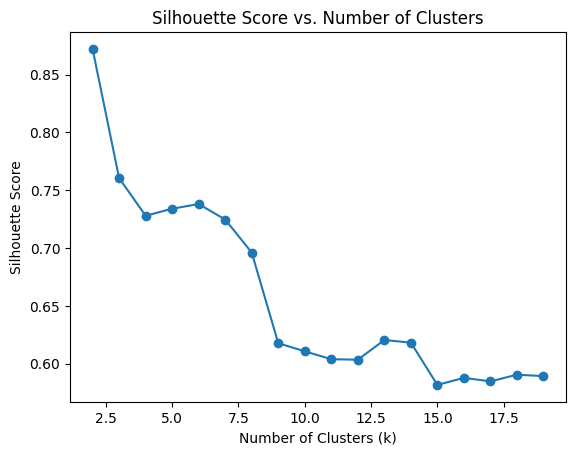


Cluster 0:

              COM-1          COM-2          POP-1      STA-1        STA-2  \
count  3.100000e+01      31.000000      31.000000  31.000000    31.000000   
mean   5.467849e+06   33199.580645   20640.290323   9.553154    19.741935   
std    4.300076e+06   20931.286966   27265.270055   2.775766   474.851624   
min    4.276666e+05    4536.000000     889.000000   5.332534 -1219.000000   
25%    2.585035e+06   21855.500000    5085.500000   7.299199   -69.500000   
50%    3.762452e+06   26585.000000   10447.000000   8.864248    56.000000   
75%    6.541064e+06   38998.500000   23143.500000  12.221575   266.000000   
max    1.748868e+07  108630.000000  115367.000000  13.617841  1110.000000   

              STA-3       STA-4      STA-5      STA-7        STA-8  ...  \
count     31.000000   31.000000  31.000000  31.000000    31.000000  ...   
mean    3512.548387   30.000000   6.516129  18.516129  1804.516129  ...   
std     4918.648431   96.259372   5.830214  34.349062   718.580307  

In [328]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Choose a range of values for k
k_values = range(2, 20)

# Calculate the silhouette score for each value of k
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Choose the optimal k (e.g., from the elbow method)
optimal_k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

# Explore characteristics of each cluster
for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    print(f'\nCluster {cluster_id}:\n')
    print(cluster_data.describe())
